### Air Quality Index- Decision Tree

### Dataset Description

In this project, we predict the air quality index for the city of Bangaluru, India. 

Data is collected using web-scrapping from https://en.tutiempo.net/climate/ws-432950.html

Data extraction process is automated using a separate script. Following are the links:

https://github.com/bss489/Air-Quality-Index/blob/master/Data_Extraction_1.py

https://github.com/bss489/Air-Quality-Index/blob/master/Data_Extraction_2.py

Once the data is extracted, they are combined to form a single csv file as 'Real_Combine.csv' for prediction.

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('C:/Users/bhave/.spyder-py3/Data/Real-Data/Real_Combine.csv')

In [3]:
df.head()

T    TM   Tm     SLP     H   VV    V    VM      PM 2.5
0   7.4   9.8  4.8  1017.6  93.0  0.5  4.3   9.4  219.720833
1   7.8  12.7  4.4  1018.5  87.0  0.6  4.4  11.1  182.187500
2   6.7  13.4  2.4  1019.4  82.0  0.6  4.8  11.1  154.037500
3   8.6  15.5  3.3  1018.7  72.0  0.8  8.1  20.6  223.208333
4  12.4  20.9  4.4  1017.3  61.0  1.3  8.7  22.2  200.645833

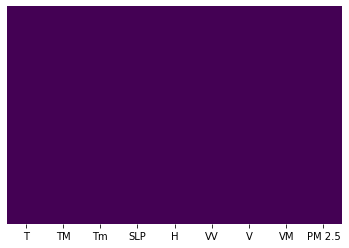

In [4]:
## Check for null values

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
df= df.dropna()

In [6]:
X=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features

In [7]:
## check null values
X.isnull().sum()

T      0
TM     0
Tm     0
SLP    0
H      0
VV     0
V      0
VM     0
dtype: int64

In [8]:
y.isnull().sum()

0

In [9]:
df.corr()

T        TM        Tm       SLP         H        VV         V  \
T       1.000000  0.967276  0.958892 -0.884383 -0.518870  0.622637  0.326067   
TM      0.967276  1.000000  0.896699 -0.829254 -0.599629  0.598479  0.320116   
Tm      0.958892  0.896699  1.000000 -0.909514 -0.315305  0.560299  0.312904   
SLP    -0.884383 -0.829254 -0.909514  1.000000  0.274196 -0.491842 -0.346130   
H      -0.518870 -0.599629 -0.315305  0.274196  1.000000 -0.475279 -0.399079   
VV      0.622637  0.598479  0.560299 -0.491842 -0.475279  1.000000  0.402884   
V       0.326067  0.320116  0.312904 -0.346130 -0.399079  0.402884  1.000000   
VM      0.287138  0.299508  0.259431 -0.299830 -0.370981  0.347493  0.760777   
PM 2.5 -0.628336 -0.569381 -0.669059  0.615615  0.174658 -0.628621 -0.354799   

              VM    PM 2.5  
T       0.287138 -0.628336  
TM      0.299508 -0.569381  
Tm      0.259431 -0.669059  
SLP    -0.299830  0.615615  
H      -0.370981  0.174658  
VV      0.347493 -0.628621  
V       0.760777 -0.354799  
VM      1.000000 -0.283695  
PM 2.5 -0.283695  1.000000

### Correlation Matrix with Heatmap

Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

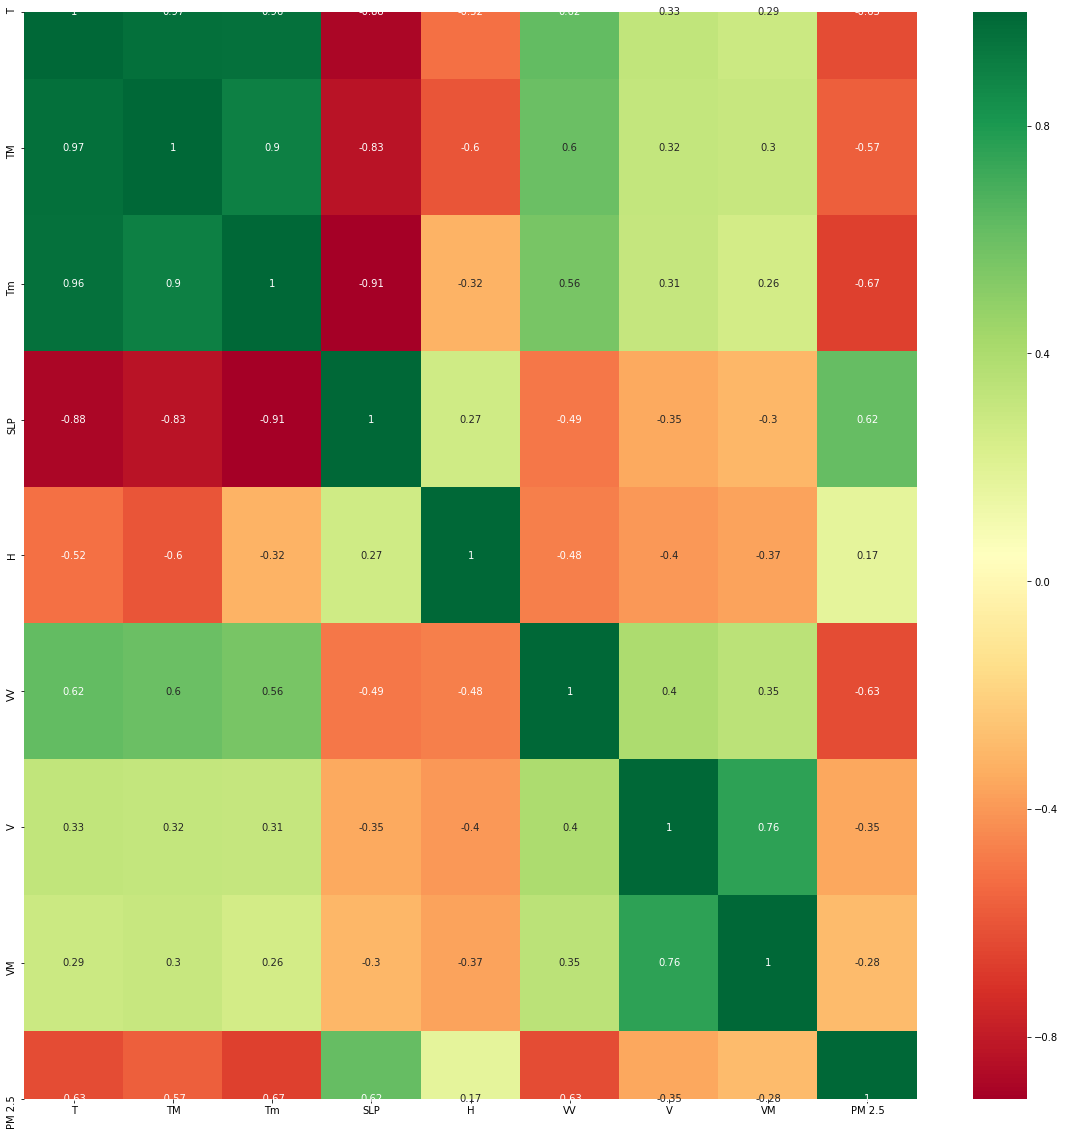

In [10]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [11]:
corrmat.index

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')

### Feature Importance

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.
Feature importance is an inbuilt class that comes with Tree Based Regressor, we will be using Extra Tree Regressor for extracting the top 10 features for the dataset.

In [12]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

C:\Users\bhave\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [13]:
X.head()

T    TM   Tm     SLP     H   VV    V    VM
0   7.4   9.8  4.8  1017.6  93.0  0.5  4.3   9.4
1   7.8  12.7  4.4  1018.5  87.0  0.6  4.4  11.1
2   6.7  13.4  2.4  1019.4  82.0  0.6  4.8  11.1
3   8.6  15.5  3.3  1018.7  72.0  0.8  8.1  20.6
4  12.4  20.9  4.4  1017.3  61.0  1.3  8.7  22.2

In [14]:
print(model.feature_importances_)

[0.17831091 0.09830591 0.1703616  0.15528606 0.08805416 0.21018973
 0.06064768 0.03884395]


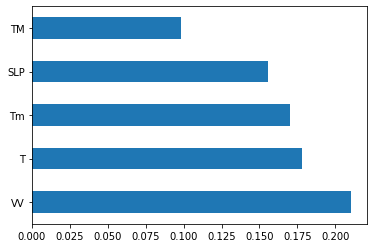

In [15]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

### Decision Tree Regressor

C:\Users\bhave\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


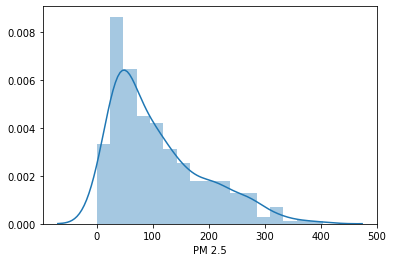

In [16]:
sns.distplot(y)

### Train Test Split

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [18]:
from sklearn.tree import DecisionTreeRegressor

In [19]:
dtree=DecisionTreeRegressor(criterion="mse")

In [20]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [21]:
print("Coefficient of determination R^2 <-- on train set: {}".format(dtree.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 1.0


In [22]:
print("Coefficient of determination R^2 <-- on test set: {}".format(dtree.score(X_test, y_test)))

Coefficient of determination R^2 <-- on test set: 0.2597355040484386


In [23]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(dtree,X,y,cv=5)

In [24]:
score.mean()

0.16539599897969087

### Tree Visualization

In [25]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus

In [26]:
features = list(df.columns[:-1])
features

['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM']

In [27]:
import os

In [28]:
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

In [29]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Model Evaluation

In [30]:
prediction=dtree.predict(X_test)

C:\Users\bhave\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


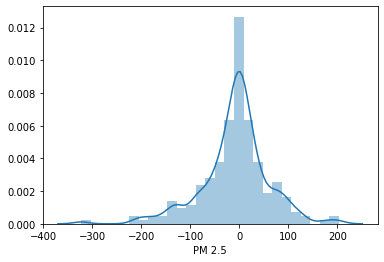

In [31]:
sns.distplot(y_test-prediction)

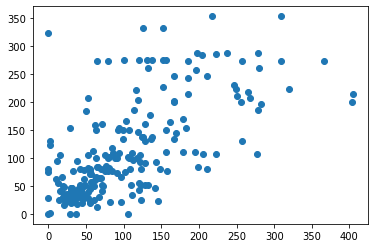

In [32]:
plt.scatter(y_test,prediction)

### Hyperparameter Tuning

In [33]:
DecisionTreeRegressor()

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [35]:
params={
 "splitter"    : ["best","random"] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_samples_leaf" : [ 1,2,3,4,5 ],
"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
 "max_features" : ["auto","log2","sqrt",None ],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70]
    
}

In [36]:
## Hyperparameter optimization using GridSearchCV
from sklearn.model_selection import GridSearchCV

In [37]:
random_search=GridSearchCV(dtree,param_grid=params,scoring='neg_mean_squared_error',n_jobs=-1,cv=10,verbose=3)

In [38]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [39]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 10 folds for each of 10240 candidates, totalling 102400 fits


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 1316 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 5796 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 12068 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done 20132 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 29988 tasks      | elapsed:   29.9s
[Parallel(n_jobs=-1)]: Done 41636 tasks      | elapsed:   37.7s
[Parallel(n_jobs=-1)]: Done 55076 tasks      | elapsed:   47.0s
[Parallel(n_jobs=-1)]: Done 70308 tasks      | elapsed:   57.5s
[Parallel(n_jobs=-1)]: Done 87332 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 102400 out of 102400 | elapsed:  1.3min finished



 Time taken: 0 hours 1 minutes and 20.06 seconds.


In [40]:
random_search.best_params_

{'max_depth': 8,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [41]:
random_search.best_score_

-3193.932466720099

In [42]:
predictions=random_search.predict(X_test)

C:\Users\bhave\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


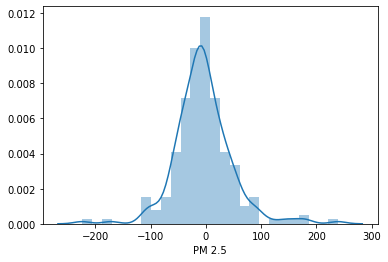

In [43]:
sns.distplot(y_test-predictions)

In [45]:
from sklearn import metrics

In [46]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 37.003969187301394
MSE: 2776.993449037152
RMSE: 52.697186348392


### Regression Evaluation Metrics

Here are three common evaluation metrics for regression problems:

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
Mean Squared Error (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$
Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:
1. MAE is the easiest to understand, because it's the average error. 
2. MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world. 
3. RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are loss functions, because we want to minimize them.

In [47]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 47.491609589041104
MSE: 4832.560510924023
RMSE: 69.51662039342838


In [48]:
import pickle

In [49]:
# open a file, where you ant to store the data
file = open('decision_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(random_search, file)